In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Reference:
https://www.kaggle.com/code/ryanholbrook/convolution-and-relu

In [3]:
!pip install -q kaggle

In [4]:
# upload the kaggle.json file which has authentication details
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rev1871","key":"3d01287fa936d534387d7e59fbf73aa3"}'}

In [5]:
#Make directory named kaggle 
!mkdir ~/.kaggle

In [6]:
# copy kaggle.json file there
!cp kaggle.json ~/.kaggle/

In [7]:
# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!pwd

/content


In [9]:
!ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Oct 17 13:44 sample_data
-rw-r--r-- 1 root root   63 Oct 18 19:43 kaggle.json


In [10]:
!cd sample_data

In [11]:
!pwd

/content


In [12]:
# agree to the terms & conditions on Kaggle
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:06<00:00, 152MB/s]
100% 812M/812M [00:06<00:00, 141MB/s]


In [13]:
!ls -ltr

total 831632
drwxr-xr-x 1 root root      4096 Oct 17 13:44 sample_data
-rw-r--r-- 1 root root        63 Oct 18 19:43 kaggle.json
-rw-r--r-- 1 root root 851576689 Oct 18 19:43 dogs-vs-cats.zip


In [14]:
# unzip the dogs-vs-cats data 
!unzip -qq dogs-vs-cats.zip

In [15]:
!ls -ltr

total 1665580
-rw-r--r-- 1 root root     88903 Dec 11  2019 sampleSubmission.csv
-rw-r--r-- 1 root root 284321224 Dec 11  2019 test1.zip
-rw-r--r-- 1 root root 569546721 Dec 11  2019 train.zip
drwxr-xr-x 1 root root      4096 Oct 17 13:44 sample_data
-rw-r--r-- 1 root root        63 Oct 18 19:43 kaggle.json
-rw-r--r-- 1 root root 851576689 Oct 18 19:43 dogs-vs-cats.zip


In [16]:
# unzip the train data 
!unzip -qq train.zip

In [17]:
!ls -ltr

total 1666332
drwxr-xr-x 2 root root    765952 Sep 20  2013 train
-rw-r--r-- 1 root root     88903 Dec 11  2019 sampleSubmission.csv
-rw-r--r-- 1 root root 284321224 Dec 11  2019 test1.zip
-rw-r--r-- 1 root root 569546721 Dec 11  2019 train.zip
drwxr-xr-x 1 root root      4096 Oct 17 13:44 sample_data
-rw-r--r-- 1 root root        63 Oct 18 19:43 kaggle.json
-rw-r--r-- 1 root root 851576689 Oct 18 19:43 dogs-vs-cats.zip


* Original data contains 25000 images (12,500 from each class of dogs and cats). 
* For this demo, create a new dataset containing three subsets: 
  * a training set with 1,000 samples of each class 
  * a validation set with 500 samples of each class, and 
  * a test set with 1,000 samples of each class.

In [18]:
import os, shutil, pathlib

In [19]:
# Path to the directory where the original dataset was uncompressed
original_dir = pathlib.Path("train")

#Directory where we will store our smaller dataset
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [20]:
# Utility function to copy cat (and dog) images from index
# start_index to index end_index to the subdirectory
# new_base_dir/{subset_name}/cat (and /dog). The
# "subset_name" will be either "train", "validation", or "test".

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
      for i in range(start_index, end_index)]

    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst=dir / fname)

In [21]:
#Create the training subset with the first 1,000 images of each category.

make_subset("train", start_index=0, end_index=1000)

In [22]:
# Create the validation subset with the next 500 images of each category.
make_subset("validation", start_index=1000, end_index=1500)

In [23]:
#Create the test subset with the next 1,000 images of each category

make_subset("test", start_index=1500, end_index=2500)

In [24]:
!ls -ltr

total 1666336
drwxr-xr-x 2 root root    765952 Sep 20  2013 train
-rw-r--r-- 1 root root     88903 Dec 11  2019 sampleSubmission.csv
-rw-r--r-- 1 root root 284321224 Dec 11  2019 test1.zip
-rw-r--r-- 1 root root 569546721 Dec 11  2019 train.zip
drwxr-xr-x 1 root root      4096 Oct 17 13:44 sample_data
-rw-r--r-- 1 root root        63 Oct 18 19:43 kaggle.json
-rw-r--r-- 1 root root 851576689 Oct 18 19:43 dogs-vs-cats.zip
drwxr-xr-x 5 root root      4096 Oct 18 19:43 cats_vs_dogs_small


## Build the model

In [25]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
# chevk the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [27]:
# complie model with loss, optimizer & metrics specifications for training
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"]
              )

* Transform the data into tensors from the format of images in the folder: cats_vs_dogs_small
* Approach
  * Read the picture files.
  * Decode the JPEG content to RGB grids of pixels.
  * Convert these into floating-point tensors.
  * Resize them to a shared size (we’ll use 180 × 180).
  * Pack them into batches (we’ll use batches of 32 images).

* Use Keras features the utility function image_dataset_from_
directory(), which quickly sets up a data pipeline that can automatically turn image files on disk into batches of preprocessed tensors.

In [28]:
# import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

# create train_dataset from train directory
train_dataset = image_dataset_from_directory(new_base_dir / "train",
                                             image_size=(180, 180),
                                             batch_size=32)

# create validation_dataset from validation directory
validation_dataset = image_dataset_from_directory(new_base_dir / "validation",
                                                  image_size=(180, 180),
                                                  batch_size=32)

# create test_dataset from test directory
test_dataset = image_dataset_from_directory(new_base_dir / "test",
                                            image_size=(180,180),
                                            batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [29]:
# inspect the shapes of images for training dataset
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


* Callbacks
* ModelCheckpoint callback saves the model after each epoch. * Configure callback with the path specifying where to save the file, pass the following arguments 
  * save_best_only=True and 
  * monitor="val_loss": 
  * above arguments to the callback only save a new file (overwriting any previous one) when the current value of the *val_loss* metric is lower than at any previous time during training. 
* This guarantees that saved file will always contain the  state of the model corresponding to its bestperforming
training epoch, in terms of its performance on the validation data. 
* Therefore, retraining a new model for a lower number of epochs is not required then the model starts
overfitting. Just reload our saved file.

In [30]:
callbacks = [ keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",
                                              save_best_only=True,
                                              monitor="val_loss")
             ]

In [31]:
# Fit the model on trained data & perform validation on validation data
history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 12s 47ms/step - loss: 0.7692 - accuracy: 0.5165 - val_loss: 0.7214 - val_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - 3s 42ms/step - loss: 0.7020 - accuracy: 0.5295 - val_loss: 0.6904 - val_accuracy: 0.4980
Epoch 3/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6980 - accuracy: 0.5700 - val_loss: 1.7623 - val_accuracy: 0.5040
Epoch 4/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6895 - accuracy: 0.6140 - val_loss: 0.6626 - val_accuracy: 0.5890
Epoch 5/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6161 - accuracy: 0.6650 - val_loss: 0.6804 - val_accuracy: 0.6330
Epoch 6/30
63/63 [==============================] - 3s 44ms/step - loss: 0.5643 - accuracy: 0.7070 - val_loss: 0.6317 - val_accuracy: 0.6170
Epoch 7/30
63/63 [==============================] - 3s 46ms/step - loss: 0.5719 - accuracy: 0.7085 - val_loss: 0.5943 - val_accuracy: 0.6770
Epoch 8/30
6

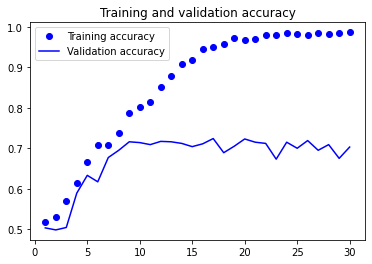

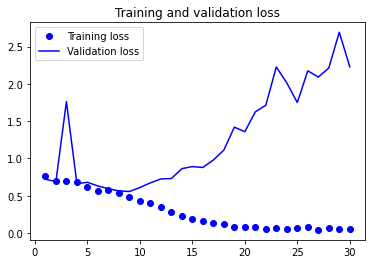

In [32]:
# View the loss and accuracy of the model during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [33]:
# review the model accuracy on test dataset
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 32ms/step - loss: 0.5966 - accuracy: 0.6970
Test accuracy: 0.697


## Data Augmentation

In [34]:
# Define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

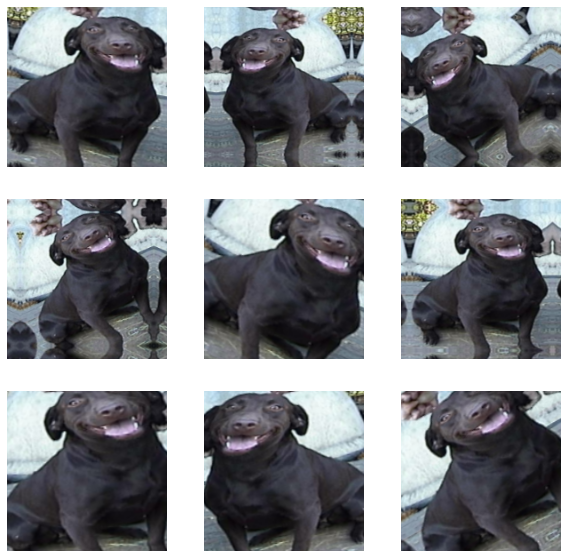

In [35]:
# Displaying some randomly augmented training images
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [36]:
# Defining a new convnet that includes image augmentation and dropout
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [38]:
# complie model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [39]:
# Callbacks
callbacks = [ keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_with_augmentation.keras",
                                              save_best_only=True,
                                              monitor="val_loss")
            ]


In [40]:
# fit or train the model
history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 6s 66ms/step - loss: 0.7090 - accuracy: 0.5160 - val_loss: 0.6913 - val_accuracy: 0.5040
Epoch 2/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6934 - accuracy: 0.5330 - val_loss: 0.7861 - val_accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 4s 64ms/step - loss: 0.7103 - accuracy: 0.5790 - val_loss: 0.6561 - val_accuracy: 0.6110
Epoch 4/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6845 - accuracy: 0.6080 - val_loss: 0.6964 - val_accuracy: 0.5440
Epoch 5/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6609 - accuracy: 0.6300 - val_loss: 0.6341 - val_accuracy: 0.6250
Epoch 6/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6194 - accuracy: 0.6640 - val_loss: 0.6321 - val_accuracy: 0.6350
Epoch 7/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6229 - accuracy: 0.6715 - val_loss: 0.7165 - val_accuracy: 0.6300
Epoch 

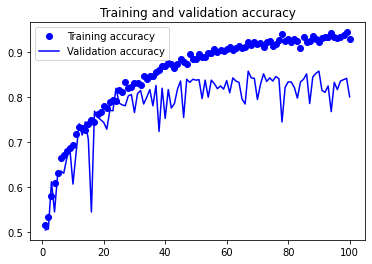

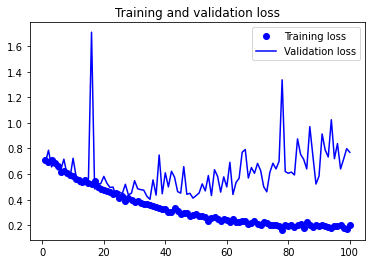

In [41]:
# Check model loss and accuracy
# View the loss and accuracy of the model during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [42]:
# check model accuracy
test_model = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 21ms/step - loss: 0.4378 - accuracy: 0.8095
Test accuracy: 0.809


## Pre-trained model

In [43]:
# Instantiating the VGG16 convolutional base
#conv_base = keras.applications.vgg16.VGG16(
 #   weights="imagenet",
  #  include_top=False,
   # input_shape=(180, 180, 3)
   # )

conv_base = keras.applications.vgg16.VGG16(weights="imagenet",
                                           include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [44]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [45]:
# model specifications
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


In [46]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                           

In [47]:
# compile model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [48]:
# call backs
callbacks = [ keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [49]:
# fit the model
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 10s 127ms/step - loss: 22.4078 - accuracy: 0.8940 - val_loss: 4.1884 - val_accuracy: 0.9670
Epoch 2/50
63/63 [==============================] - 7s 113ms/step - loss: 7.9431 - accuracy: 0.9410 - val_loss: 4.5076 - val_accuracy: 0.9660
Epoch 3/50
63/63 [==============================] - 7s 113ms/step - loss: 6.7879 - accuracy: 0.9510 - val_loss: 4.7722 - val_accuracy: 0.9690
Epoch 4/50
63/63 [==============================] - 7s 114ms/step - loss: 5.7324 - accuracy: 0.9520 - val_loss: 4.1968 - val_accuracy: 0.9760
Epoch 5/50
63/63 [==============================] - 7s 113ms/step - loss: 4.7222 - accuracy: 0.9640 - val_loss: 8.7915 - val_accuracy: 0.9500
Epoch 6/50
63/63 [==============================] - 7s 113ms/step - loss: 3.5378 - accuracy: 0.9690 - val_loss: 5.0182 - val_accuracy: 0.9640
Epoch 7/50
63/63 [==============================] - 8s 117ms/step - loss: 2.9938 - accuracy: 0.9725 - val_loss: 2.8614 - val_accuracy: 0.9750
Epoc

In [50]:
# evaluate model
test_model = keras.models.load_model(
"feature_extraction_with_data_augmentation.keras")

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 60ms/step - loss: 2.0419 - accuracy: 0.9755
Test accuracy: 0.975


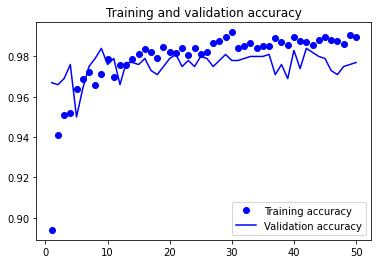

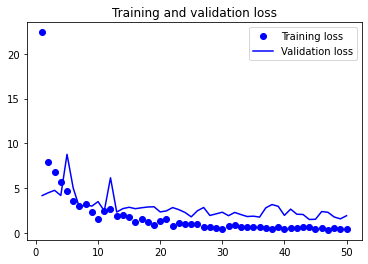

In [51]:
# plot model loss and accuracy
# Check model loss and accuracy
# View the loss and accuracy of the model during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Incorporating pre-trained model fine tuning with image data augmentation

In [52]:
#Freezing all layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

In [53]:
# complie model
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])



In [54]:
# model call backs
callbacks = [ keras.callbacks.ModelCheckpoint(filepath="fine_tuning_pretrained.keras",
                                              save_best_only=True,
                                              monitor="val_loss")
]

In [55]:
#train model
history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 10s 127ms/step - loss: 0.4947 - accuracy: 0.9860 - val_loss: 1.6567 - val_accuracy: 0.9780
Epoch 2/100
63/63 [==============================] - 8s 121ms/step - loss: 0.3173 - accuracy: 0.9915 - val_loss: 1.8122 - val_accuracy: 0.9740
Epoch 3/100
63/63 [==============================] - 8s 125ms/step - loss: 0.2343 - accuracy: 0.9915 - val_loss: 1.6127 - val_accuracy: 0.9790
Epoch 4/100
63/63 [==============================] - 8s 120ms/step - loss: 0.1144 - accuracy: 0.9935 - val_loss: 2.4802 - val_accuracy: 0.9780
Epoch 5/100
63/63 [==============================] - 8s 124ms/step - loss: 0.3312 - accuracy: 0.9865 - val_loss: 1.5091 - val_accuracy: 0.9810
Epoch 6/100
63/63 [==============================] - 8s 124ms/step - loss: 0.2470 - accuracy: 0.9910 - val_loss: 1.3984 - val_accuracy: 0.9790
Epoch 7/100
63/63 [==============================] - 8s 120ms/step - loss: 0.0936 - accuracy: 0.9955 - val_loss: 2.8405 - val_accuracy: 0.968

In [56]:
#Evaluate the model on the test data:
test_model = keras.models.load_model("fine_tuning_pretrained.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# evaluate model
#test_model = keras.models.load_model(
#"feature_extraction_with_data_augmentation.keras")

#test_loss, test_acc = test_model.evaluate(test_dataset)
#print(f"Test accuracy: {test_acc:.3f}")


63/63 [==============================] - 4s 59ms/step - loss: 1.7037 - accuracy: 0.9785
Test accuracy: 0.979
63/63 [==============================] - 4s 59ms/step - loss: 2.0419 - accuracy: 0.9755
Test accuracy: 0.975


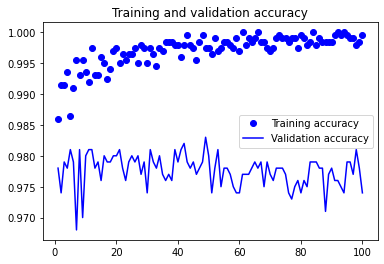

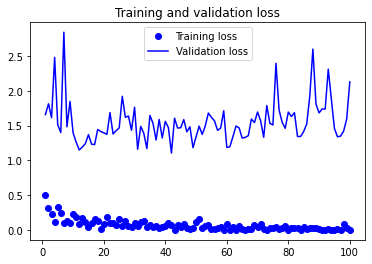

In [57]:
# plot model loss and accuracy
# Check model loss and accuracy
# View the loss and accuracy of the model during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()